In [1]:
# !pip install tensorflow-gpu==2.0.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPool2D,Dropout

In [4]:
print(tf.__version__)

2.7.0


In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train,y_train),(x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


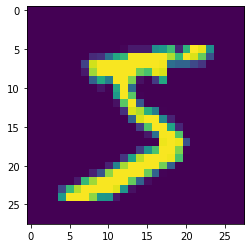

In [7]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train.max()

255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
input_shape=x_train[0].shape

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[28,28,1]))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())#convert 2d data to vector form
model.add(Dense(units=128,activation='relu'))#fully connected layer
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.2304 - accuracy: 0.9301 - val_loss: 0.0542 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0830 - accuracy: 0.9749 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.0348 - val_accuracy: 0.9881
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0324 - val_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0271 - val_accuracy: 0.9917
Epoch 7/10
60000/60000 [==========================

In [ ]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.029668068310460514, 0.9916]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


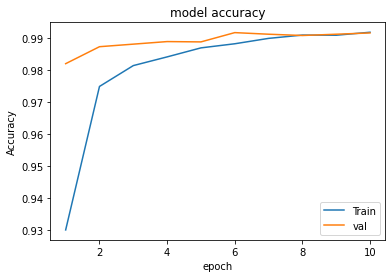

In [ ]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upperleft')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


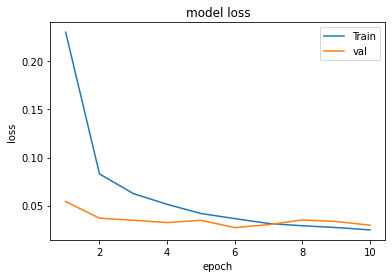

In [ ]:

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upperleft')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
mat = confusion_matrix(y_test,y_pred)

In [ ]:
mat

array([[ 976,    0,    0,    1,    0,    0,    1,    0,    2,    0],
       [   0, 1132,    0,    0,    0,    1,    2,    0,    0,    0],
       [   2,    0, 1018,    0,    2,    0,    1,    6,    3,    0],
       [   0,    0,    0,  998,    0,    8,    0,    1,    3,    0],
       [   0,    0,    0,    0,  977,    0,    1,    0,    2,    2],
       [   2,    0,    0,    2,    0,  885,    2,    0,    0,    1],
       [   3,    1,    0,    0,    1,    1,  950,    0,    2,    0],
       [   0,    0,    3,    0,    0,    0,    0, 1024,    1,    0],
       [   2,    0,    0,    1,    0,    0,    0,    1,  970,    0],
       [   0,    1,    0,    0,    6,    4,    0,    4,    8,  986]])